In [2]:
#Basic
import numpy as np
import pandas as pd
import math
import datetime
import matplotlib.pyplot as plt
from finta import TA

#CNN

#Using tensorflow2.4
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error

In [17]:
#Read dataset
# csv = 'Yahoo/AAPL.csv'
csv = 'data/IT Companies/AAPL.csv'
df = pd.read_csv(csv)
# df.reset_index(drop=True, inplace=True)
df =df.rename(columns={'Volume': 'volume'})
df =df.rename(columns={'Open': 'open'})
df =df.rename(columns={'High': 'high'})
df =df.rename(columns={'Low': 'low'})
df =df.rename(columns={'Close': 'close'})
df.set_index('Date', inplace=True)
# df = df[1000:20000]
df

,open,high,low,close,Adj Close,volume
Date,,,,,,
1987-01-02,0.180246,0.183594,0.179129,0.182478,0.143028,120870400
1987-01-05,0.184152,0.193080,0.183036,0.191964,0.150463,239680000
1987-01-06,0.192522,0.196429,0.190290,0.195313,0.153088,324800000
1987-01-07,0.195871,0.200335,0.194754,0.199777,0.156587,434560000
1987-01-08,0.199777,0.201451,0.198661,0.199777,0.156587,291200000
...,...,...,...,...,...,...
2021-09-20,143.800003,144.839996,141.270004,142.940002,142.940002,123478900
2021-09-21,143.929993,144.600006,142.779999,143.429993,143.429993,75834000
2021-09-22,144.449997,146.429993,143.699997,145.850006,145.850006,76404300


In [18]:
#ohlc - dataframe, columns = [open high low close volume] (index by date)
ohlc = pd.DataFrame(df, columns=['open', 'high', 'low', 'close', 'volume'])

#Create a dataframe for indicators
indicator = pd.DataFrame(index = ohlc.index)

#Calculate indicators
indicator['RSI'] = TA.RSI(ohlc)
indicator['MACD'] = TA.MACD(ohlc).MACD
indicator['EMA'] = TA.RSI(ohlc)
indicator['WILLIAMS'] = TA.WILLIAMS(ohlc)
indicator['UO'] = TA.UO(ohlc)
indicator['MFI'] = TA.MFI(ohlc)
# indicator['open'] = ohlc['open']
# indicator['high'] = ohlc['high']
# indicator['low'] = ohlc['low']
# indicator['close'] = ohlc['close']
# indicator['volume'] = ohlc['volume']
# indicator['RSI'] = TA.RSI(ohlc, 7)
# indicator['RSI'] = TA.RSI(ohlc, 14)
# indicator['RSI'] = TA.RSI(ohlc, 28)
# indicator['MACD1'] = TA.MACD(ohlc, 12, 26).MACD
# indicator['MACD2'] = TA.MACD(ohlc, 14, 28).MACD
# indicator['MACD3'] = TA.MACD(ohlc, 16, 30).MACD
# indicator['EMA'] = TA.EMA(ohlc, 9)
# indicator['EMA'] = TA.EMA(ohlc, 13)
# indicator['EMA'] = TA.EMA(ohlc, 17)
# indicator['WILLIAMS'] = TA.WILLIAMS(ohlc, 14)
# indicator['WILLIAMS'] = TA.WILLIAMS(ohlc, 18)
# indicator['WILLIAMS'] = TA.WILLIAMS(ohlc, 22)
# indicator['UO'] = TA.UO(ohlc)
# indicator['MFI'] = TA.MFI(ohlc, 14)
# indicator['MFI'] = TA.MFI(ohlc, 18)
# indicator['MFI'] = TA.MFI(ohlc, 22)
# indicator['CCI1'] = TA.CCI(ohlc, 5)
# indicator['CCI2'] = TA.CCI(ohlc, 10)
# indicator['CCI3'] = TA.CCI(ohlc, 20)


# indicator['CFI'] = TA.CFI(ohlc)
# indicator['CCI'] = TA.CCI(ohlc)
# indicator['COPP'] = TA.COPP(ohlc)
# indicator['FISH'] = TA.FISH(ohlc)
# indicator['ADL'] = TA.ADL(ohlc)
# indicator['WOBV'] = TA.WOBV(ohlc)
# indicator['VPT'] = TA.VPT(ohlc)
# indicator['VFI'] = TA.VFI(ohlc)
# indicator['MSD'] = TA.MSD(ohlc)
# indicator['STC'] = TA.STC(ohlc)

<Figure size 1152x576 with 0 Axes>

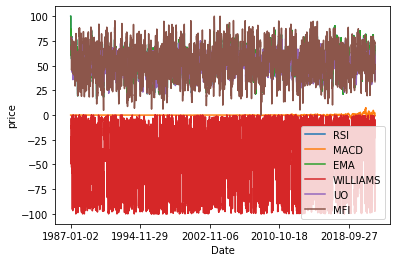

In [19]:
# Visualize indicator
def plot_df(df):
    plt.figure(figsize=(16, 8))
    df.plot()
    plt.ylabel('price')
    plt.show()
plot_df(indicator)

In [5]:
indicator

,RSI,MACD,EMA,WILLIAMS,UO,MFI
Date,,,,,,
2016-08-22,NaN,0.000000,NaN,NaN,NaN,NaN
2016-08-23,100.000000,0.001907,100.000000,NaN,NaN,NaN
2016-08-24,27.798506,-0.003927,27.798506,NaN,NaN,NaN
2016-08-25,19.355742,-0.010636,19.355742,NaN,NaN,NaN
2016-08-26,13.367703,-0.020325,13.367703,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-05,77.287894,4.351827,77.287894,-7.002321,70.919114,71.726988
2020-08-06,80.469634,4.994780,80.469634,-2.018411,75.879794,77.165066
2020-08-07,72.520414,5.219035,72.520414,-13.060235,69.759230,69.506714


In [20]:
#Find start date, indicator have NaN at begining
startIndex = 0
for i in range(len(indicator)):
    if indicator.iloc[i,:].isnull().any() != True:
        startIndex = i
        break
print(startIndex)
        
#Create label
close = np.array(df['close'])[startIndex:]
label = close[1:] - close[:-1]
print(len(label))

#Normalization
nor_ind = indicator.iloc[startIndex:-1,:].apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
# label = [x - np.min(label) / (np.max(label)-np.min(label)) for x in label]




#DataFrame to np.array
dataset = np.array(nor_ind)
dataset = dataset.reshape(dataset.shape[1],dataset.shape[0])
print(dataset.shape)
print(dataset)

#Change shape for CNN model
dataset = np.repeat(dataset[np.newaxis, :, :], dataset.shape[0], axis=0)
dataset = dataset.reshape(dataset.shape[2],dataset.shape[1],dataset.shape[0])
dataset = np.array(dataset)[:, :, :, np.newaxis]
print(dataset.shape)

label[label >= 0] = 1
label[label < 0] = 0
label = to_categorical(label, 2)

## Generating X,Y for train, vlidation and test
train_size = int(len(dataset)*0.7)
valid_size = int(len(dataset)*0.15)
test_size = int(len(dataset)*0.15)
trainX, validX, testX = dataset[0: train_size], dataset[train_size: train_size+valid_size], dataset[train_size: len(dataset)]
trainY, validY, testY = label[0: train_size], label[train_size: train_size+valid_size], label[train_size: len(label)]
print(trainX.shape)
print(trainY.shape)

27
8726
(6, 8726)
[[0.54958642 0.38353048 0.54958642 ... 0.796309   0.7641487  0.38477024]
 [0.7641487  0.85295087 0.69153254 ... 0.3843976  0.72486471 0.88281906]
 [0.68036238 0.82652953 0.68014128 ... 0.96167958 0.5380684  0.57083967]
 [0.62662206 0.38345893 0.62662206 ... 0.6996852  0.71927799 0.39362845]
 [0.71927799 0.95857308 0.85157214 ... 0.37196941 0.31132519 0.26713049]
 [0.4764719  0.37930175 0.26076199 ... 0.34771739 0.5009024  0.34109748]]
(8726, 6, 6, 1)
(6108, 6, 6, 1)
(6108, 2)


In [21]:
class CNN(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#         self.add(BatchNormalization())#do batch normalization
        self.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
#         self.add(BatchNormalization())#do batch normalization
        
        self.add(MaxPooling2D(pool_size=(2, 2)))
        self.add(Dropout(0.25))
        
        self.add(Flatten())
        
        self.add(Dense(128, activation='relu'))
        self.add(BatchNormalization())#do batch normalization
        self.add(Dropout(0.5))#reduce the number of dropout
        
        #add another dense, same as above
#         self.add(Dense(128, activation='relu'))
#         self.add(BatchNormalization())
#         self.add(Dropout(0.5))
        
        self.add(Dense(nb_classes, activation='softmax'))
        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [22]:
model = CNN(trainX[0].shape, 2)
# model.load_weights("char_cnn_1.h5")
model.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 4, 32)          320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512     

In [23]:
nb_classes = 2
batch_size=256
epochs=100
model_path = 'model.h5'

In [24]:
# model_checkpoint = ModelCheckpoint(model_path,
#                                    monitor = 'loss',
#                                    verbose = 1,
#                                    save_best_only = True)
history = model.fit(trainX, 
                    trainY, 
                    batch_size=batch_size, 
                    epochs=epochs, 
#                     callbacks = [model_checkpoint],
                    validation_data=(validX, validY))

Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 0.7548 - accuracy: 0.4982 - val_loss: 0.6947 - val_accuracy: 0.5107
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5219 - val_loss: 0.6938 - val_accuracy: 0.5107
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5324 - val_loss: 0.6937 - val_accuracy: 0.5107
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5290 - val_loss: 0.6940 - val_accuracy: 0.5107
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5295 - val_loss: 0.6940 - val_accuracy: 0.5107
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5309 - val_loss: 0.6943 - val_accuracy: 0.5107
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5308 - val_loss: 0.6934 - val_accuracy: 0.5107
Epoch 8/100
2

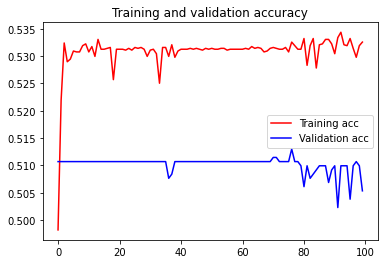

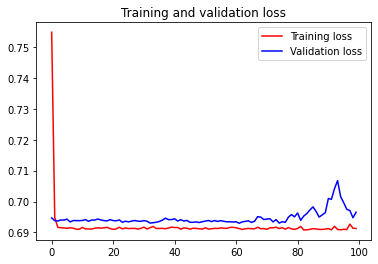

In [25]:
#  plot loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(epochs)
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("accuracy.png",dpi = 300)
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("loss.png", dpi = 300)
plt.show() 

In [26]:
score = model.evaluate(testX,testY)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 0s 408us/step - loss: 0.6935 - accuracy: 0.5229
Test loss: 0.6934546828269958
Test accuracy: 0.5229182839393616


In [27]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = [np.argmax(x) for x in trainPredict]
testPredict = [np.argmax(x) for x in testPredict]
train_label = [np.argmax(x) for x in trainY]
test_label = [np.argmax(x) for x in testY]

trainScore = math.sqrt(mean_squared_error(train_label, trainPredict))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(test_label, testPredict))
print('Test Sccore %.2f RMSE' %(testScore))

Train Sccore 0.68 RMSE
Test Sccore 0.69 RMSE


In [15]:
def OverallAccuracy(confusionMatrix):  
    #  Return overall accuracy
    # acc = (TP + TN) / (TP + TN + FP + TN)  
    OA = np.diag(confusionMatrix).sum() / confusionMatrix.sum()  
    return OA
  
def Precision(confusionMatrix):  
    #  Return precision for each class
    precision = np.diag(confusionMatrix) / confusionMatrix.sum(axis = 0)
    return precision  

def Recall(confusionMatrix):
    #  Return recall for each class
    recall = np.diag(confusionMatrix) / confusionMatrix.sum(axis = 1)
    return recall
  
def F1Score(confusionMatrix):
    precision = np.diag(confusionMatrix) / confusionMatrix.sum(axis = 0)
    recall = np.diag(confusionMatrix) / confusionMatrix.sum(axis = 1)
    f1score = 2 * precision * recall / (precision + recall)
    return f1score
def IntersectionOverUnion(confusionMatrix):  
    #  Return IoU
    intersection = np.diag(confusionMatrix)  
    union = np.sum(confusionMatrix, axis = 1) + np.sum(confusionMatrix, axis = 0) - np.diag(confusionMatrix)  
    IoU = intersection / union
    return IoU

def MeanIntersectionOverUnion(confusionMatrix):  
    #  Return mIoU
    intersection = np.diag(confusionMatrix)  
    union = np.sum(confusionMatrix, axis = 1) + np.sum(confusionMatrix, axis = 0) - np.diag(confusionMatrix)  
    IoU = intersection / union
    mIoU = np.nanmean(IoU)  
    return mIoU
  
def Frequency_Weighted_Intersection_over_Union(confusionMatrix):
    #  Return FWIoU
    freq = np.sum(confusionMatrix, axis=1) / np.sum(confusionMatrix)  
    iu = np.diag(confusionMatrix) / (
            np.sum(confusionMatrix, axis = 1) +
            np.sum(confusionMatrix, axis = 0) -
            np.diag(confusionMatrix))
    FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
    return FWIoU

from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(np.array(testPredict), np.array(test_label))
precision = Precision(confusionMatrix)
recall = Recall(confusionMatrix)
OA = OverallAccuracy(confusionMatrix)
IoU = IntersectionOverUnion(confusionMatrix)
FWIOU = Frequency_Weighted_Intersection_over_Union(confusionMatrix)
mIOU = MeanIntersectionOverUnion(confusionMatrix)
f1ccore = F1Score(confusionMatrix)


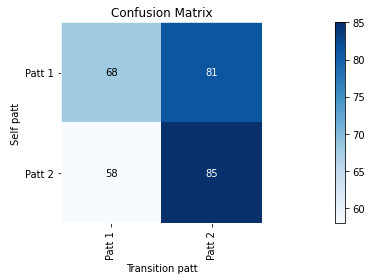

In [16]:
import seaborn as sns
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.axis("equal")
    ax = plt.gca()
    left, right = plt.xlim()
    ax.spines['left'].set_position(('data', left))
    ax.spines['right'].set_position(('data', right))
    for edge_i in ['top', 'bottom', 'right', 'left']:
        ax.spines[edge_i].set_edgecolor("white")
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        num = '{:.2f}'.format(cm[i, j]) if normalize else int(cm[i, j])
        plt.text(j, i, num,
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white" if num > thresh else "black")
    plt.ylabel('Self patt')
    plt.xlabel('Transition patt')
    plt.tight_layout()
#     plt.savefig('res/method_2.png', transparent=True, dpi=800) 
    plt.show()
label = ["Patt {}".format(i) for i in range(1, confusionMatrix.shape[0]+1)]
plot_confusion_matrix(confusionMatrix, label)

In [17]:
print("ConfusionMatrix:")
print(confusionMatrix)
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1-Score:")
print(f1ccore)
print("OverallAccuracy:")
print(OA)
print("IoU:")
print(IoU)
print("mIoU:")
print(mIOU)
print("FWIoU:")
print(FWIOU)

ConfusionMatrix:
[[68 81]
 [58 85]]
Precision:
[0.53968254 0.51204819]
Recall:
[0.45637584 0.59440559]
F1-Score:
[0.49454545 0.55016181]
OverallAccuracy:
0.523972602739726
IoU:
[0.32850242 0.37946429]
mIoU:
0.35398335058661146
FWIoU:
0.35345976972782367
